In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [9]:
# Параметры
a = 0  # математическое ожидание
sigma2 = 2  # дисперсия
sigma = np.sqrt(sigma2)  # стандартное отклонение
gamma = 0.91  # доверительная вероятность
n = 20  # объем выборки
M = 1750  # количество выборок
K = 140  # количество повторений для оценки gamma*

In [10]:
gamma_star_list = []

for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s2 = np.var(X, ddof=1)
    delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
    sigma2_left = (n - 1) * s2 / delta_0
    sigma2_right = (n - 1) * s2 / delta_1
    # Проверяем, попадает ли истинная дисперсия в интервал
    if sigma2_left <= sigma2 <= sigma2_right:
        gamma_star_list.append(1)
    else:
        gamma_star_list.append(0)

gamma_star = np.mean(gamma_star_list)
print(f"1. Фактическая γ*: {gamma_star}")

1. Фактическая γ*: 0.9325714285714286


In [11]:
# 2. Повторить пункт 1, K раз, для получения массива gamma*
gamma_star_values = []

for _ in range(K):
    gamma_star_list = []
    for _ in range(M):
        X = np.random.normal(a, sigma, size=n)
        s2 = np.var(X, ddof=1)
        delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
        delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
        sigma2_left = (n - 1) * s2 / delta_0
        sigma2_right = (n - 1) * s2 / delta_1
        if sigma2_left <= sigma2 <= sigma2_right:
            gamma_star_list.append(1)
        else:
            gamma_star_list.append(0)
    gamma_star_values.append(np.mean(gamma_star_list))

In [12]:
# Характеристики распределения gamma*
mean_gamma_star = np.mean(gamma_star_values)
var_gamma_star = np.var(gamma_star_values)

print(f"2. Математическое ожидание γ*: {mean_gamma_star}")
print(f"2. Дисперсия γ*: {var_gamma_star}")


2. Математическое ожидание γ*: 0.9097510204081631
2. Дисперсия γ*: 5.687328613077891e-05


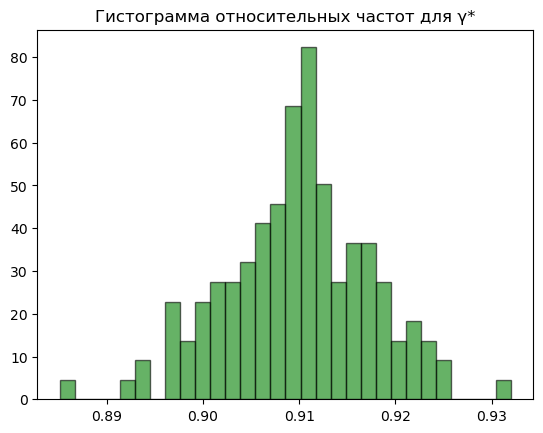

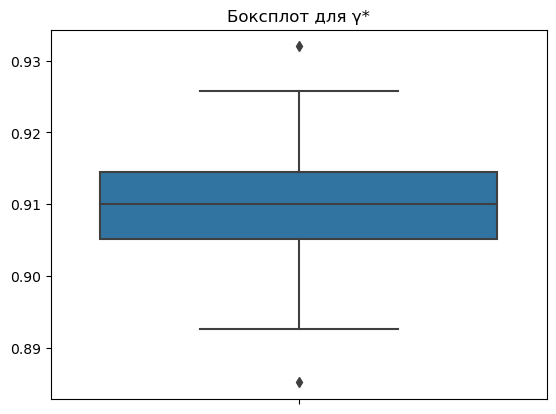

In [13]:
# Построение гистограммы и боксплота
plt.hist(gamma_star_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title("Гистограмма относительных частот для γ*")
plt.show()

sb.boxplot(y=gamma_star_values)
plt.title("Боксплот для γ*")
plt.show()

In [ ]:
count_g = 0
for i in range(M):
    W = []
    for j in range(n):
        U = np.random.exponential(scale = 3, size=7)
        W_i = sum(U) / 7
        W.append(W_i)
    s2_W = np.var(W, ddof = 1)
    d_low = st.chi2.ppf(1/2+gamma/2, df = n-1)
    d_high = st.chi2.ppf(1/2-gamma/2, df = n-1)
    s2_low = (n-1) * s2_W / d_low
    s2_high = (n-1) * s2_W / d_high
    if s2_low <= np.var(W) <= s2_high: 
        count_g += 1
print("Точечная оценка gamma*: ", count_g/M)

Точечная оценка gamma*:  1.0


(0.559726543383818, 1.7255573265138238, 0.8554863601375058)

3. Фактическая γ* для W: 1.0


4. Математическое ожидание γ* для W: 1.0
4. Дисперсия γ* для W: 0.0


In [ ]:
# Построение гистограммы для W
plt.hist(gamma_star_w_all, bins="sturges", density=True, alpha=0.6, color='b', edgecolor='black')
plt.title("Гистограмма относительных частот для γ* (W)")
plt.show()